In [428]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [429]:
#file path
file='gaussian.csv'

In [430]:
#data taken from file
xdata=np.genfromtxt(file,usecols=(0),delimiter=',')
tdata=np.genfromtxt(file,usecols=(1),delimiter=',')

In [431]:
#vector of size m making phi(x)
def make_phi(m,x_i):
    phi=np.zeros(m)
    for i in range(m):
        phi[i]=x_i**i
    return phi

In [432]:
#makes design matrix nXm
def des_mat(m,n,x):
    des= np.empty((0,m))
    for i in range(n):
        phi=make_phi(m,x[i])
        des=np.append(des,[phi],axis=0)
    return des

In [433]:
#returns (t-y)^2 for one input point(single n value)
def square_error(m,t_i,w,x_i):
    phi=make_phi(m,x_i)
    w_t=w[:,None].transpose()
    wphi=np.matmul(w_t,phi[:,None])
    y=np.sum(wphi)
    diff=t_i-y
    return diff**2#mean square error(L2)
    #return abs(diff)#L1 error#min test error is lesser than L2
    #return np.exp(abs(diff))

In [434]:
#SSE for n data points
def sum_square_error(m,n,t,w,x):
    total=0
    for i in range(n):
        total+=square_error(m,t[i],w,x[i])
    return total/2

In [435]:
#RMS error given SSE for n points
def rms_error(sse,n):
    return (sse*2/n)**0.5

In [436]:
#complete moore penrose pseudo inverse
def least_square_regression_pinv(x,t,m,n):
    des=des_mat(m,n,x)
    moopeninv=np.linalg.pinv(des)
    wml=np.matmul(moopeninv,t)
    res=sum_square_error(m,n,t,wml,x)
    rmsres=rms_error(res,n)
    return wml,res,rmsres

In [438]:
xmin=(min(xdata))
xmax=(max(xdata))
print(xmin)
print(xmax)

-1.4
2.56


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


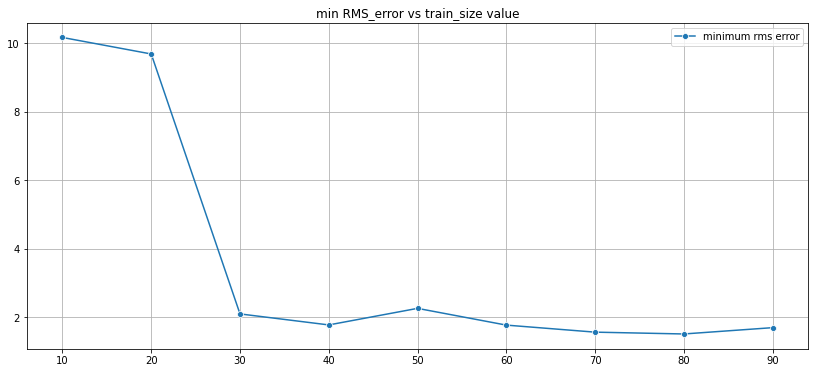

In [472]:
#error vs train size
errs=[]
for i in range(10,100,10):
    train_size=i
    test_size=100-train_size
    xtrain=xdata[:train_size]
    ttrain=tdata[:train_size]
    xvalid=xdata[train_size:]
    tvalid=tdata[train_size:]
    m_range=30
    errmin=1e33 #stores minimum error
    training_rms=[]
    testing_rms=[]
    for i in range(m_range):
        m=i
        n=train_size
        wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
        sse=sum_square_error(m,test_size,tvalid,wml,xvalid)
        rms=rms_error(sse,test_size)
        #print(i,rmsres,rms)
        training_rms.append(rmsres)
        testing_rms.append(rms)
        if rms<errmin:
            errmin=rms
            wml_best=wml
            m_best=m
    #print('train_size: ',i ,'m: ',m_best,'\nerr: ',errmin,'\nwml: ',wml_best)
    errs.append(errmin)
xp=[i for i in range(10,100,10)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,errs,marker='o',label='minimum rms error')
plt.title('min RMS_error vs train_size value')
plt.grid(True)
plt.show()

0 14.713011075188687 8.537683675710877
1 14.45515164975314 5.951361241510347
2 12.358232841858849 9.30572468838139
3 10.109152159192222 12.368580377051522
4 7.2959341345732645 13.881069482046493
5 5.937238512332886 15.396242356637547
6 5.5352633068827135 16.555528005614736
7 5.482136718870851 16.04081586440213
8 4.875278113925569 13.717099789148257
9 3.862281327440373 10.470910957718024
10 2.3224250789877576 5.751265955813565
11 1.5203681437707268 2.686872614325319
12 1.2931855215393682 1.6789538896657246
13 1.2930596213904446 1.6925092610909456
14 1.2834057401224919 1.5953757638587884
15 1.2728675827470053 1.508459058172129
16 1.2557884930013399 1.9442885635914153
17 1.2259088377167486 2.9657362292487344
18 1.2213234784554607 2.646349626633264
19 1.21819744556371 3.447928941152438
20 1.2076397555294194 4.34627212320701
21 1.199357756072822 2.966413168094615
22 1.1972769455973855 1.8221060754458525
23 1.194465044549854 3.4971252893992237
24 1.1869176822330767 4.9315942707312255
25 1.18

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


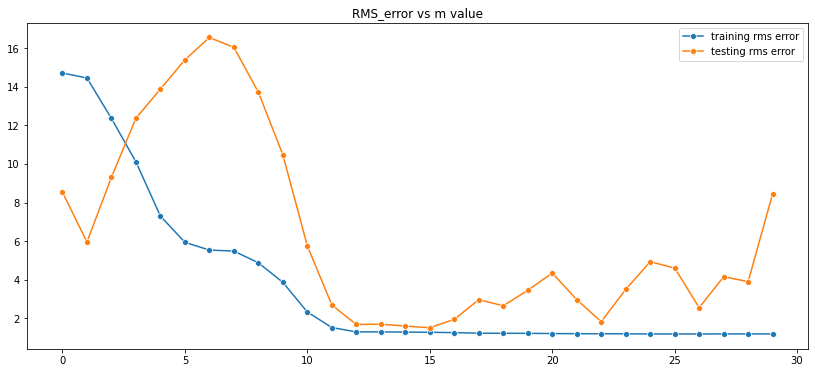

In [473]:
#error vs degree of poly
#80 20 train test split
#min test error found at 80 20 split
train_size=80
test_size=100-train_size
xtrain=xdata[:train_size]
ttrain=tdata[:train_size]
xvalid=xdata[train_size:]
tvalid=tdata[train_size:]
m_range=30
errmin=1e33
training_rms=[]
testing_rms=[]
for i in range(m_range):
    m=i
    n=train_size
    wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
    sse=sum_square_error(m,test_size,tvalid,wml,xvalid)
    rms=rms_error(sse,test_size)
    print(i,rmsres,rms)
    training_rms.append(rmsres)
    testing_rms.append(rms)
    if rms<errmin:
        errmin=rms
        wml_best=wml
        m_best=m
print('m optimal: ',m_best,'\nerr optimal: ',errmin,'\nwml optimal: ',wml_best)
xp=[i for i in range(m_range)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,training_rms,marker='o',label='training rms error')
sns.lineplot(xp,testing_rms,marker='o',label='testing rms error')
plt.title('RMS_error vs m value')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


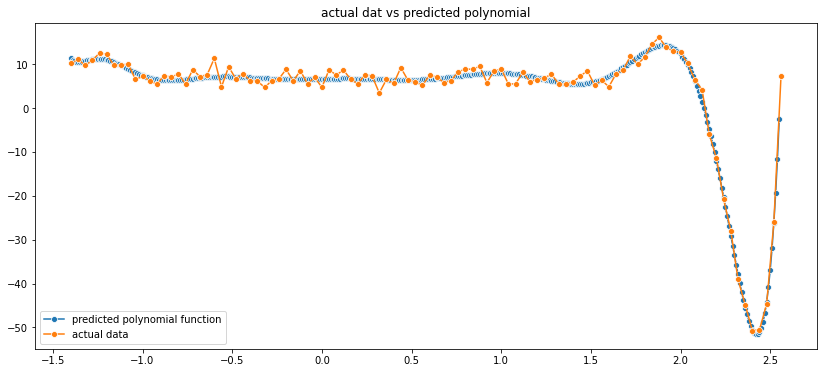

In [441]:
#best fit poly


#xp=[i/100 for i in range(-243,341)]#non gaussian fit
xp=[i/100 for i in range(-140,256)]#gaussian fit
yp=[]
for x_coord in xp:
    phi=make_phi(m_best,x_coord)
    yp.append(np.sum(np.matmul(wml_best.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual dat vs predicted polynomial')
plt.show()


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


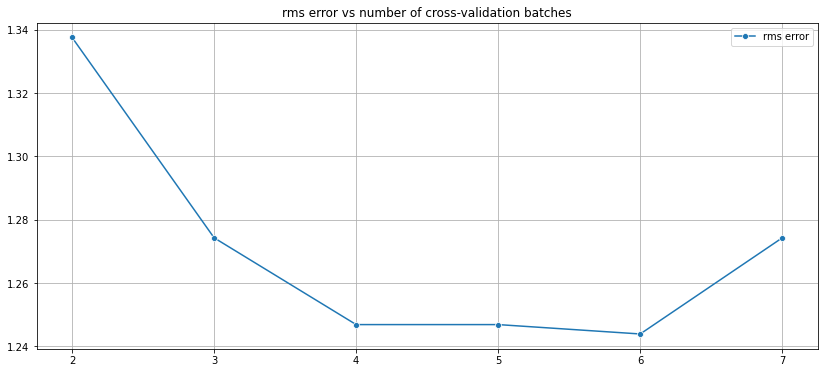

In [474]:
#optimizing cross val batch number
err=[]
for k in range(2,8):
    data_points_total=100
    val_set_size=int(data_points_total/k)
    train_set_size=data_points_total-val_set_size
    m_avg=[]
    testing_errors=[]
    for val_step in range(k):
        test_begin_index=k*val_step
        test_end_index=min(test_begin_index+val_set_size,data_points_total)
        xtrain=np.append(xdata[:test_begin_index],xdata[test_end_index:])
        ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
        xvalid=xdata[test_begin_index:test_end_index]
        tvalid=tdata[test_begin_index:test_end_index]
        m_range=30
        errmin=1e33
        for i in range(m_range):
            m=i
            n=train_set_size
            wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
            sse=sum_square_error(m,val_set_size,tvalid,wml,xvalid)
            rms=rms_error(sse,val_set_size)
            if rms<errmin:
                errmin=rms
                wml_best=wml
                m_best=m
        m_avg.append(m_best)
        testing_errors.append(errmin)
    #print('m of rounds: ',m_avg)
    #print('testing errors of rounds: ',testing_errors)
    m_final=int(np.sum(m_avg)/k)
    #print('m final',m_final)
    wml,res,rmsres=least_square_regression_pinv(xdata,tdata,m_final,data_points_total)
    #print('rms error for m_final',rmsres)
    err.append(rmsres)
#best fit poly after cross_validation
xp=[i for i in range(2,8)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,err,marker='o',label='rms error')
plt.title('rms error vs number of cross-validation batches')
plt.grid(True)
plt.show()

m of rounds:  [18, 12, 18, 29, 27, 11]
testing errors of rounds:  [1.6750330559687072, 1.6195072872707088, 1.296224353403048, 1.0016513114509924, 1.1891426619328618, 1.6749345495433454]
m final 19
error for m_final 1.243937337574132


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


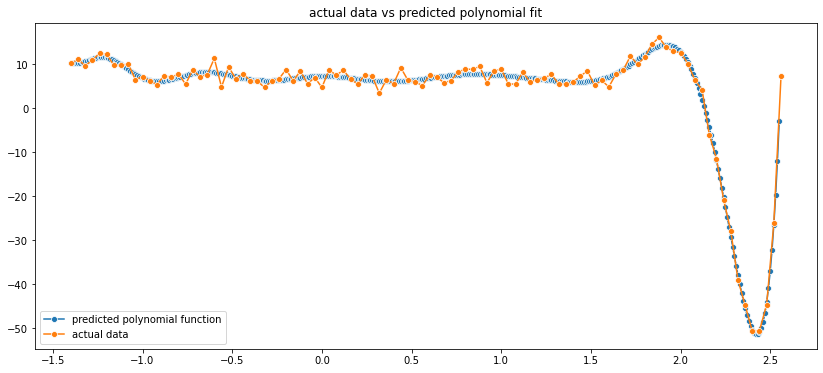

In [458]:
#k batch cross val (k taken to be 6 gives good result)
data_points_total=100
k=6
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
m_avg=[]
testing_errors=[]
for val_step in range(k):
    test_begin_index=k*val_step
    test_end_index=min(test_begin_index+val_set_size,data_points_total)
    xtrain=np.append(xdata[:test_begin_index],xdata[test_end_index:])
    ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
    xvalid=xdata[test_begin_index:test_end_index]
    tvalid=tdata[test_begin_index:test_end_index]
    m_range=30
    errmin=1e33
    for i in range(m_range):
        m=i
        n=train_set_size
        wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
        sse=sum_square_error(m,val_set_size,tvalid,wml,xvalid)
        rms=rms_error(sse,val_set_size)
        if rms<errmin:
            errmin=rms
            wml_best=wml
            m_best=m
    m_avg.append(m_best)
    testing_errors.append(errmin)
print('m of rounds: ',m_avg)
print('testing errors of rounds: ',testing_errors)
m_final=int(np.sum(m_avg)/k)
print('m final',m_final)
wml,res,rmsres=least_square_regression_pinv(xdata,tdata,m_final,data_points_total)
#print('rms error for m_final',rmsres)
print('error for m_final',rmsres)
#best fit poly after cross_validation
#xp=[i/100 for i in range(-243,341)]
xp=[i/100 for i in range(-140,256)]
yp=[]
for x_coord in xp:
    phi=make_phi(m_final,x_coord)
    yp.append(np.sum(np.matmul(wml.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual data vs predicted polynomial fit')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


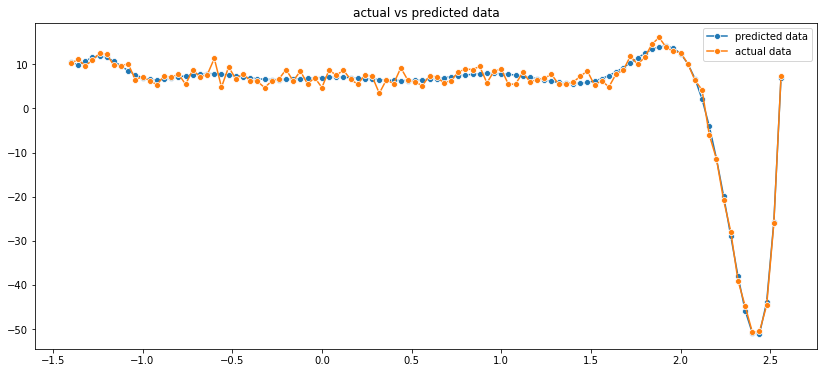

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


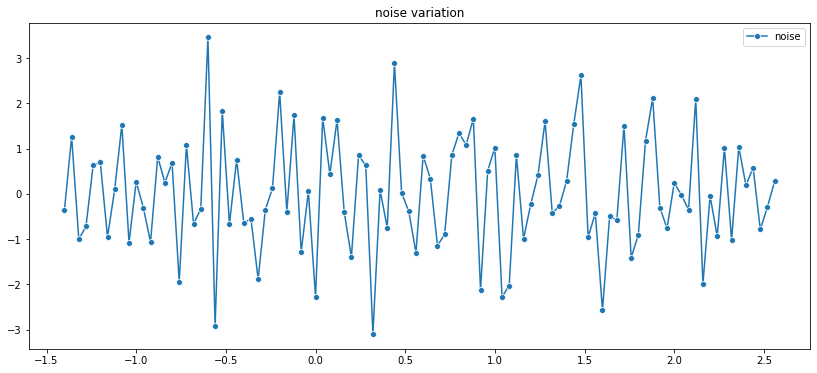

mean of noise -7.115042333083466e-11
variance of noise 1.6238283400873437


In [476]:
#noise variantion
pred=[]

for i in range(100):
    phi=make_phi(m_final,xdata[i])
    pred.append(np.sum(np.matmul(wml.transpose(),phi)))
'''
m_final=8
wml,res,rmsres=least_square_regression_pinv(xdata,tdata,m_final,20)
for i in range(20):
    phi=make_phi(m_final,xdata[i])
    pred.append(np.sum(np.matmul(wml.transpose(),phi)))
'''
#noise=np.absolute(np.subtract(tdata,pred))
noise=(np.subtract(tdata,pred))
plt.figure(figsize=(14,6))
sns.lineplot(xdata,pred,marker='o',label='predicted data')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual vs predicted data')
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(xdata,noise,marker='o',label='noise')
plt.title('noise variation')
plt.show()
print('mean of noise',np.mean(noise))
print('variance of noise',np.var(noise))

In [445]:
noise.shape

(100,)

0 1.28827387232017 1.2167758298164433
1 1.2867199038349058 1.2314855064439691
2 1.2862187065501436 1.2363810657907692
3 1.286035398302212 1.2386964300697314
4 1.2818987801406896 1.275587208862983
5 1.2804437457380553 1.2887458856463883
6 1.2804415286446051 1.2886449746898474
7 1.2804163182660564 1.2891167118717772
8 1.2798761379360295 1.2933613405494095
9 1.2788886047075538 1.3051304266114518
10 1.2782346613373425 1.314417362810989
11 1.278193193777806 1.31607080659563
12 1.2617026772179265 1.595019057339213
13 1.259146626123857 1.6355379751468955
14 1.2563213546673235 1.8115569765953226
15 1.2562979283341402 1.8167663342178777
16 1.255788493000675 1.9442885636719938
17 1.2259088377173857 2.96573622949083
18 1.2213234784689384 2.646349628914095
19 1.2181974455616449 3.447928944891288
20 1.2076397556242817 4.346272126345476
21 1.1993577561575957 2.9664131159515685
22 1.1972769460069368 1.82210621960172
23 1.1944650444290759 3.4971238574263075
24 1.1869176810861632 4.931589130038706
25 1

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


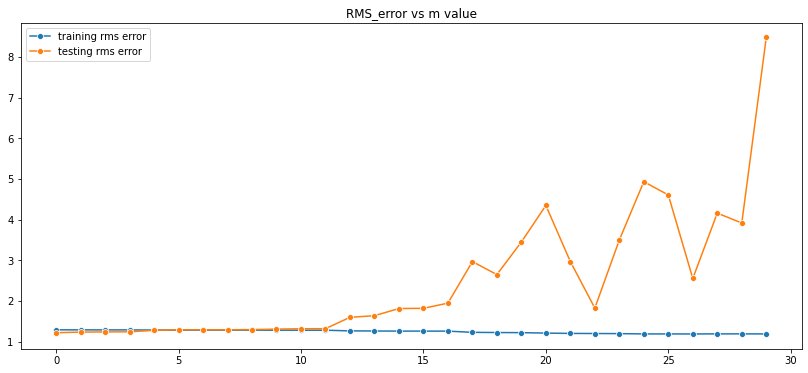

In [477]:
#noise estimation
#80 20 train test split
#min test error found at 80 20 split
train_size=80
test_size=100-train_size
xtrain=xdata[:train_size]
ttrain=noise[:train_size]
xvalid=xdata[train_size:]
tvalid=noise[train_size:]
m_range=30
errmin=1e33
training_rms=[]
testing_rms=[]
for i in range(m_range):
    m=i
    n=train_size
    wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
    sse=sum_square_error(m,test_size,tvalid,wml,xvalid)
    rms=rms_error(sse,test_size)
    print(i,rmsres,rms)
    training_rms.append(rmsres)
    testing_rms.append(rms)
    if rms<errmin:
        errmin=rms
        wml_best=wml
        m_best=m
print('m optimal: ',m_best,'\nerr optimal: ',errmin,'\nwml optimal: ',wml_best)
xp=[i for i in range(m_range)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,training_rms,marker='o',label='training rms error')
sns.lineplot(xp,testing_rms,marker='o',label='testing rms error')
plt.title('RMS_error vs m value')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


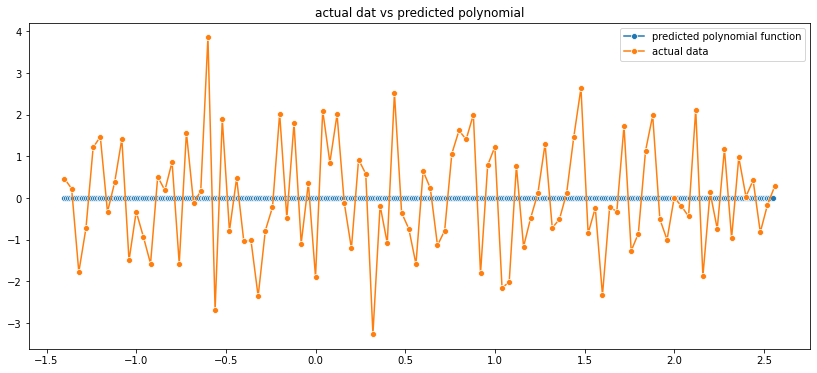

In [461]:

#xp=[i/100 for i in range(-243,341)]
xp=[i/100 for i in range(-140,256)]
yp=[]
for x_coord in xp:
    phi=make_phi(m_best,x_coord)
    yp.append(np.sum(np.matmul(wml_best.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xdata,noise,marker='o',label='actual data')
plt.title('actual dat vs predicted polynomial')
plt.show()


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


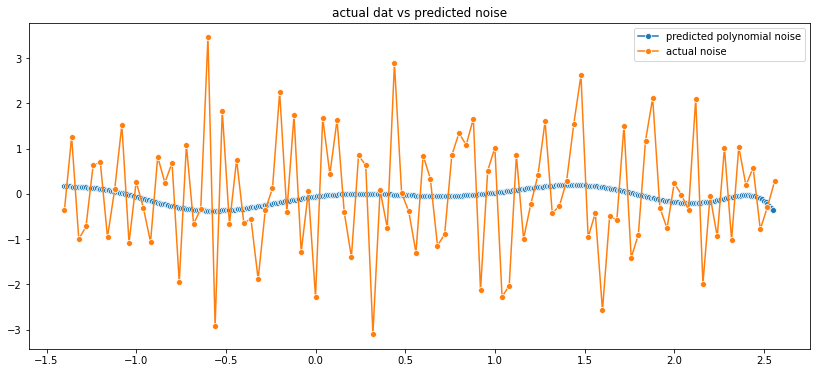

In [478]:
#poly fit of noise
m=10
wml,res,rmsres=least_square_regression_pinv(xtrain,ttrain,m,n)
xp=[i/100 for i in range(-140,256)]
#xp=[i/100 for i in range(-243,341)]
yp=[]
for x_coord in xp:
    phi=make_phi(m,x_coord)
    yp.append(np.sum(np.matmul(wml.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial noise')
sns.lineplot(xdata,noise,marker='o',label='actual noise')
plt.title('actual dat vs predicted noise')
plt.show()

In [449]:
#regularized

In [479]:
def reg_sum_square_error(lamb,m,n,t,w,x):
    sse=sum_square_error(m,n,t,w,x)
    rege=np.sum((lamb/2)*np.matmul(w.transpose(),w))
    return rege+sse

In [480]:
def reg_least_square_regression_pinv(xdata,tdata,m,n,lamb):
    x=xdata[:n]
    t=tdata[:n]
    des=des_mat(m,n,x)
    #pinv
    '''
    pinv=np.matmul(des.transpose(),des)
    a=np.identity(m)
    a=a*lamb
    pinv=np.add(pinv,a)
    pinv=np.linalg.inv(pinv)
    pinv=np.matmul(pinv,des.transpose())
    '''
    pinv = np.matmul(np.linalg.pinv(lamb*np.identity(m)+np.matmul(np.transpose(des),des)),np.transpose(des))
    #print('reg',pinv)
    wmlreg=np.matmul(pinv,t)
    #res=sum_square_error(m,n,t,wmlreg,x)
    resreg=reg_sum_square_error(lamb,m,n,t,wmlreg,x)
    #rmsres=rms_error(res,n)
    rmsresreg=rms_error(resreg,n)
    return wmlreg,resreg,rmsresreg

In [481]:
wmlreg,resreg,rmsresreg=reg_least_square_regression_pinv(xdata,tdata,26,100,0)
print(wmlreg)

[ 4.94773803e-06 -5.35839649e-07  1.11962934e-05  2.44839441e-06
  2.66034318e-05  1.41200219e-05  6.52438521e-05  5.11753579e-05
  1.60861140e-04  1.53757205e-04  3.85277783e-04  3.99293521e-04
  8.57053437e-04  8.73320796e-04  1.65609622e-03  1.45183900e-03
  2.45372627e-03  1.23388573e-03  1.99796151e-03 -1.41822380e-03
  4.86532605e-06 -4.01422851e-03  4.05891982e-03 -1.27290253e-03
  8.93363627e-05  1.17091691e-05]


0 14.713011075188687 8658.907795944999
1 14.458363136819532 8361.770583845677
2 12.402146742938513 6152.529753335215
3 10.219223679259144 4177.301304269232
4 7.4274339963884985 2206.6710308283045
5 6.072321659186894 1474.9236133052111
6 5.610005141409995 1258.886307465863
7 5.6077864150861165 1257.8907390889758
8 5.384139691377268 1159.558408650564
9 4.748369233325891 901.8804150398365
10 3.801081015989046 577.9286756044927
11 2.8645676676911282 328.22991691125566
12 1.9447968776100548 151.28939580647273
13 1.6360253066187502 107.06315215587904
14 1.5696996038801865 98.55827385686459
15 1.5496340024617017 96.05462166341894
16 1.5351988335178353 94.27341833738089
17 1.5187239079626313 92.26089234469148
18 1.5179209905349411 92.16336534026308
19 1.506724426316763 90.80873987438315
m:  19 
err:  2.204796165352431 
wml:  [ 6.3600285   0.08384697  1.00455154  0.94522523  0.20756443  0.18278151
 -0.24958152 -0.70257156 -0.29063993 -0.86756095  0.36521205 -0.02422399
  0.83917315  0.18833376 

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


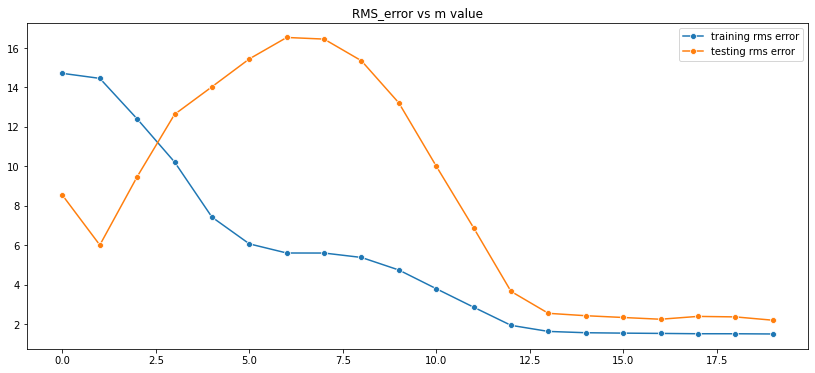

In [482]:
#redundant exploratory code block
train_size=80
test_size=100-train_size
xtrain=xdata[:train_size]
ttrain=tdata[:train_size]
xvalid=xdata[train_size:]
tvalid=tdata[train_size:]
m_range=20
errmin=1e33
lamb=1
training_rms=[]
testing_rms=[]
for i in range(m_range):
    m=i
    n=train_size
    wmlreg,resreg,rmsresreg=reg_least_square_regression_pinv(xtrain,ttrain,m,n,lamb)
    sse=reg_sum_square_error(lamb,m,test_size,tvalid,wmlreg,xvalid)
    rms=rms_error(sse,test_size)
    print(i,rmsresreg,resreg)
    training_rms.append(rmsresreg)
    testing_rms.append(rms)
    if rms<errmin:
        errmin=rms
        wml_best=wmlreg
        m_best=m
print('m: ',m_best,'\nerr: ',errmin,'\nwml: ',wml_best)

xp=[i for i in range(m_range)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,training_rms,marker='o',label='training rms error')
sns.lineplot(xp,testing_rms,marker='o',label='testing rms error')
plt.title('RMS_error vs m value')
plt.show()

3.059023205018258e-07 0.8312025073758852 0.029479836557875044
8.315287191035679e-07 0.8312086194257801 0.03300731468641425
2.2603294069810542e-06 0.8312261943357936 0.0411477252915098
6.14421235332821e-06 0.8312780597204649 0.057742014055487144
1.670170079024566e-05 0.8314175210853568 0.08817805912901315
4.5399929762484854e-05 0.8317917415495123 0.1404469213430445
0.00012340980408667956 0.8327925539949488 0.22657938979629985
0.00033546262790251185 0.835401527631413 0.36273037463464264
0.0009118819655545162 0.8120347272158445 1.049004052589617
0.0024787521766663585 0.8440268936605194 1.0271266092373552
0.006737946999085467 0.8783154995681495 1.2109671399497353
0.01831563888873418 0.9234826273368787 1.4936182156582414
0.049787068367863944 0.9867496955247546 1.9145734008933712
0.1353352832366127 1.0961616732582256 2.7171771782326237
0.36787944117144233 1.3155163176671165 4.114344604697879


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


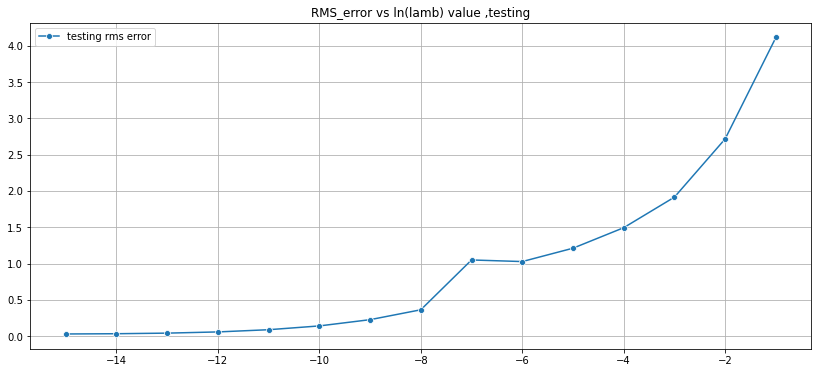

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


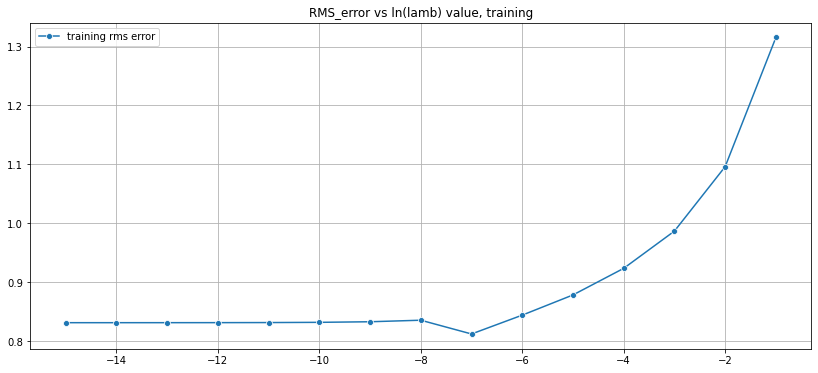

In [483]:
#error vs lambda
lambdas=[i for i in range(-15,0)]
train_size=19
test_size=20-train_size
xtrain=xdata[:train_size]
ttrain=tdata[:train_size]
xvalid=xdata[train_size:]
tvalid=tdata[train_size:]
training_rms=[]
testing_rms=[]
for lambd in lambdas:
    m=m_final
    n=train_size
    lamb=np.exp(lambd)
    wmlreg,resreg,rmsresreg=reg_least_square_regression_pinv(xtrain,ttrain,m,n,lamb)
    sse=reg_sum_square_error(lamb,m,test_size,tvalid,wmlreg,xvalid)
    rms=rms_error(sse,test_size)
    print(lamb,rmsresreg,rms)
    training_rms.append(rmsresreg)
    testing_rms.append(rms)
plt.figure(figsize=(14,6))
#sns.lineplot(lambdas,training_rms,marker='o',label='training rms error')
sns.lineplot(lambdas,testing_rms,marker='o',label='testing rms error')
plt.title('RMS_error vs ln(lamb) value ,testing')
plt.grid(True)
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(lambdas,training_rms,marker='o',label='training rms error')
#sns.lineplot(lambdas,testing_rms,marker='o',label='testing rms error')
plt.title('RMS_error vs ln(lamb) value, training')
plt.grid(True)
plt.show()

In [484]:
#k batch cross val (k taken to be 6 gives good result)
data_points_total=100
k=6
lamb=np.exp(-11)
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
testing_errors=[]
m_avg=[]
for val_step in range(k):
    test_begin_index=k*val_step
    test_end_index=min(test_begin_index+val_set_size,data_points_total)
    xtrain=np.append(xdata[:test_begin_index],xdata[test_end_index:])
    ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
    xvalid=xdata[test_begin_index:test_end_index]
    tvalid=tdata[test_begin_index:test_end_index]
    m_range=30
    errmin=1e33
    for i in range(m_range):
        m=i
        n=train_set_size
        wml,res,rmsres=reg_least_square_regression_pinv(xtrain,ttrain,m,n,lamb)
        sse=reg_sum_square_error(lamb,m,val_set_size,tvalid,wml,xvalid)
        rms=rms_error(sse,val_set_size)
        if rms<errmin:
            errmin=rms
            #wml_best=wml
            m_best=m
    m_avg.append(m_best)
    testing_errors.append(errmin)
print('m of rounds: ',m_avg)
print('testing errors of rounds: ',testing_errors)
m_final=int(np.sum(m_avg)/k)
print('m final',m_final)
wml,res,rmsres=reg_least_square_regression_pinv(xdata,tdata,m_final,data_points_total,lamb)
print('rms error for m_final',rmsres)


m of rounds:  [17, 17, 12, 14, 17, 11]
testing errors of rounds:  [1.676879007995895, 1.6125639246259023, 1.3560034801408, 1.133891113487614, 1.2492650607412907, 1.6773732982842087]
m final 14
rms error for m_final 1.3155627710363553


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


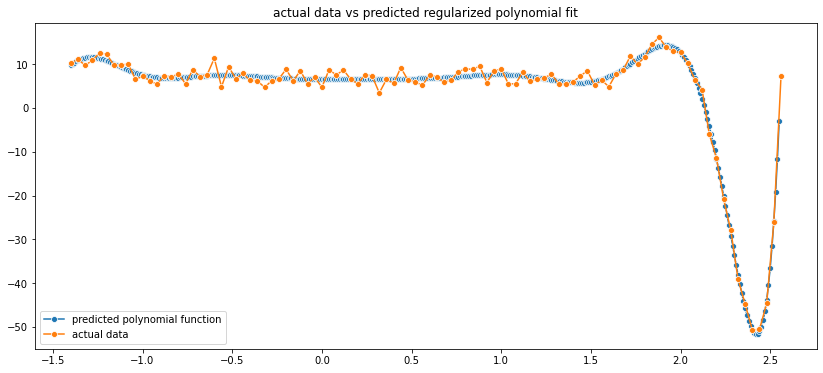

In [485]:
#best fit poly after cross_validation
xp=[i/100 for i in range(-140,256)]
yp=[]
for x_coord in xp:
    phi=make_phi(m_final,x_coord)
    yp.append(np.sum(np.matmul(wml.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual data vs predicted regularized polynomial fit')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


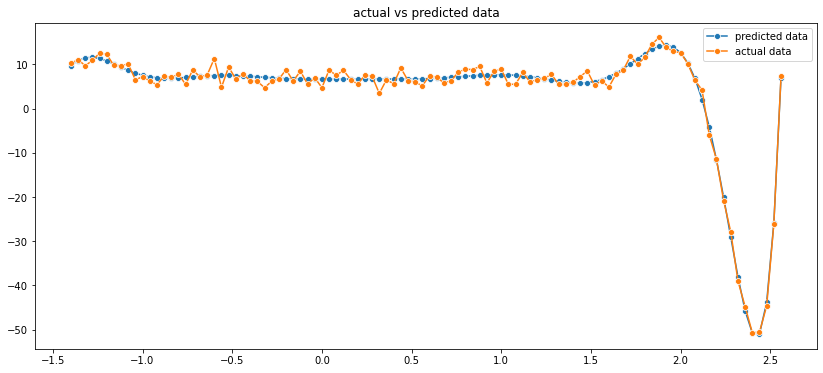

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


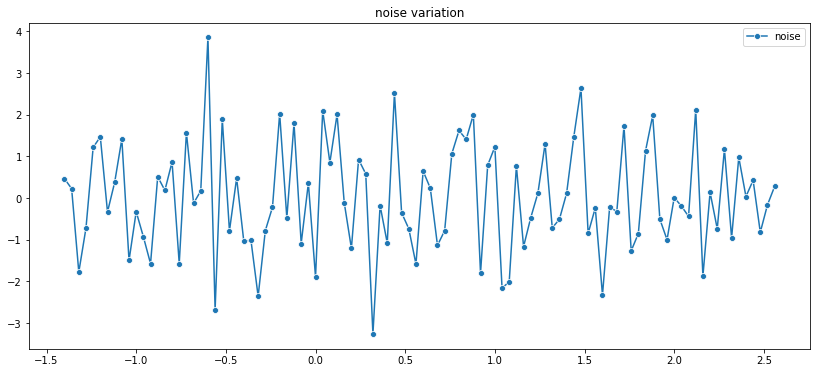

mean of noise -2.201964287973368e-06
variance of noise 1.730049687848573


In [486]:
#noise variance
pred=[]
for i in range(100):
    phi=make_phi(m_final,xdata[i])
    pred.append(np.sum(np.matmul(wml.transpose(),phi)))
#noise=np.absolute(np.subtract(tdata,pred))
noise=(np.subtract(tdata,pred))
plt.figure(figsize=(14,6))
sns.lineplot(xdata,pred,marker='o',label='predicted data')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual vs predicted data')
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(xdata,noise,marker='o',label='noise')
plt.title('noise variation')
plt.show()
print('mean of noise',np.mean(noise))
print('variance of noise',np.var(noise))